# MIAR03: ALGORITMOS DE OPTIMIZACIÓN: Problema 3. Combinar cifras y operaciones

- El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva

- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta( resta(--), multiplicación(*) y

- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:
4+2 6/3*1 = 4

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:

- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?

Nota: Es posible usar la función de python “eval ” 

## resolviendo el problema por fuerza bruta

### creando una función que me de las permutaciones de los elementos de una lista

#### Nota:

Más adelante me he dado cuenta de que no hacia falta por el módulo itertools de python, pero dejo el trabajo hecho. He utilizado la técnica de divide y venceras para esta función.

In [1]:
# Esta funcion devuelve todas las permutaciones posibles de una lista
def permutaciones(lst):

    permutaciones_ = []                                                     # defino la lista de las permutaciones posibles
    permutaciones_.append(lst)                                              # meto la primera lista original como una permutacion posible

    if len(lst) < 2:                                                        # si el tamaño de la lista es inferior a 1 entonces finaliza la funcion
        return permutaciones_
    
    elif len(lst) == 2:                                                     # si el tamaño de la lista es 2 le da la vuelta a la lista y finaliza la funcion
        lst.reverse()
        permutaciones_.append(lst)
        return permutaciones_                                               # devuelve la funcion original y la misma en el orden inverso
    
    else:                                                                   # si el tamaño de la lista es sueperior a 2
        for elem in lst:                                                    # para cada elemento en la lista
            #print(elem)
            sub_lst = lst.copy()                                                # creo una copia de la lista, por que luego la voy a modificar
            sub_lst.remove(elem)                                                # quito el elemento de analisis de esta lista copia y creo una sub_lista sin el elemento 
            perm_ope = permutaciones(sub_lst)                                   # aplico RECURSIVIDAD para la sublista, la cual me devuelve todas sus reordenaciones posibles
            #print(perm_ope)

            for perm in perm_ope:                                           # para cada permutacion en mi sublista reordenada       
                for i in range(len(perm)+1):                                # para cada posicion en el rango de mi sublista +1 
                    permutacion = perm.copy()                               # creo una copia de cada permutacion, para que las modificaciones no le afecten
                    permutacion.insert(i, elem)                             # inserto el elemento de analisis en cada posicion

                    if permutacion not in permutaciones_:                   # si dicha permutacion no esta ya, en mi lista de permutaciones, la añado a la misma
                        permutaciones_.append(permutacion)

        return permutaciones_                                               # devuelvo la lista de todas las permutaciones posibles


### Comprobando la función permutaciones

In [2]:
permutations = permutaciones(['+','-','*'])

for n in permutations:
     print(n)
print(len(permutations))

['+', '-', '*']
['+', '*', '-']
['*', '+', '-']
['*', '-', '+']
['-', '*', '+']
['-', '+', '*']
6


In [3]:
permutations = permutaciones(['+','-','*','/'])

for n in permutations:
     print(n)
print(len(permutations))

['+', '-', '*', '/']
['-', '+', '*', '/']
['-', '*', '+', '/']
['-', '*', '/', '+']
['+', '-', '/', '*']
['-', '+', '/', '*']
['-', '/', '+', '*']
['-', '/', '*', '+']
['+', '/', '-', '*']
['/', '+', '-', '*']
['/', '-', '+', '*']
['/', '-', '*', '+']
['+', '/', '*', '-']
['/', '+', '*', '-']
['/', '*', '+', '-']
['/', '*', '-', '+']
['+', '*', '/', '-']
['*', '+', '/', '-']
['*', '/', '+', '-']
['*', '/', '-', '+']
['+', '*', '-', '/']
['*', '+', '-', '/']
['*', '-', '+', '/']
['*', '-', '/', '+']
24


In [4]:
permutations = permutaciones(['+','-','*','/', '**'])
print(len(permutations)) # el resultado es n! por lo que el resultado es correcto

120


### CONSTRUYENDO EL ESPACIO DE POSIBILIDADES (por fuerza bruta)

NOTA: Esta implementación no esta formalizada (esta en sucio, pues es mi primera versión), mas adelante la mejoro y formalizo. El cálculo de la complejidad esta basado en la mejora que hare posteriormente

In [5]:
# se definen los valores para cada posicion

pos_0 = (1,2,3,4,5,6,7,8,9)
pos_1 = (1,2,3,4,5,6,7,8,9)
pos_2 = (1,2,3,4,5,6,7,8,9)
pos_3 = (1,2,3,4,5,6,7,8,9)
pos_4 = (1,2,3,4,5,6,7,8,9)

operaciones = ['+','-','*','/']                                                     # las operaciones que quiero que realize

permutaciones_posibles = permutaciones(operaciones)                          # esta funcion me devolverá todas las permutaciones posibles 

expresions = []                                                                     # aqui guardaré las combinaciones posibles

for secuencia in permutaciones_posibles:                                            # para cada permutacion de operaciones posible

    for n_0 in pos_0:                                                               # para cada numero de la primera posicion

        expresion = []                                                              # se crea una lista en la cual voy a guardar mi expresion
        expresion.append(str(n_0))                                                  # se le añade el primer numero
        expresion.append(secuencia[0])                                              # le añado tambien el operador correspondiente (+,-,*,/)

        for n_1 in pos_1:                                                           # Para cada numero en la segunda posicion

            if str(n_1) in expresion:                                               # si el número ya esta en la expresion saltamos de al siguiente bucle
                continue

            else:
                expresion_1 = expresion.copy()                                      # se crea una copia de la expresion para que la original no sea alterada                         
                expresion_1.append(str(n_1))                                        # añado el nuevo elemento a mi expresion copia
                expresion_1.append(secuencia[1])                                    # y tambien le añado su operador correspondiente (+,-,*,/)

            for n_2 in pos_2:                                                       # para cada numero en la tercera posicion

                if str(n_2) in expresion_1:                                         # si el numero ya esta en la expresion saltamos al siguieinte bucle
                    continue

                else:
                    expresion_2 = expresion_1.copy()                                # se crea una copia de la expresion para no alterar las anteriores
                    expresion_2.append(str(n_2))                                    # se añade el nuevo elemento a la expresion copia
                    expresion_2.append(secuencia[2])                                # y tambien le añado su operador correspondiente (+,-,*,/)

                for n_3 in pos_3:                                                   # para cada numero en la cuarta posición

                    if str(n_3) in expresion_2:                                     # si el numero ya esta el la expresion saltamos al siguiente bucle
                        continue

                    else:
                        expresion_3 = expresion_2.copy()                            # se crea una copia de la expresion anterior para no modificarla
                        expresion_3.append(str(n_3))                                # se añade el nuevo numero
                        expresion_3.append(secuencia[3])                            # se ael ultimo operador corresponiente (+,-,*,/)

                    for n_4 in pos_4:                                               # para cada numero el la ultima posicion

                        if str(n_4) in expresion_3:                                 # si el numero ya esta en la lista saltamos al siguiente bucle
                            continue

                        else:
                            expresion_4 = expresion_3.copy()                        # se crea una ultima copia para no modificar la expresion anterior
                            expresion_4.append(str(n_4))                            # se le añade el numero final a la expreesion

                            str_expresion = ''.join(expresion_4)                    # se convierte la expresion un un string

                            if (eval(str_expresion) - int(eval(str_expresion))) == 0: # se evalua si el resultado de la expresion es un entero o no. Si ES ENTERO se añade a la lista de expresiones deseadas
                                expresions.append(str_expresion)

print(f'TENIENDO EN CUENTA LA RESTRICCION DE QUE DEBEN SER ENTEROS HAY {len(expresions)} COMBINACIONES POSIBLES')
print('NOTA: incluimos en la lista de expresiones unicamente la cantidad de operaciones que dan entero')

TENIENDO EN CUENTA LA RESTRICCION DE QUE DEBEN SER ENTEROS HAY 90000 COMBINACIONES POSIBLES
NOTA: incluimos en la lista de expresiones unicamente la cantidad de operaciones que dan entero


### Formalizando el algoritmo por fuerza bruta

In [18]:
nums = ('1','2','3','4','5','6','7','8','9')
operations = ('+', '-', '/', '*')

def secuencias_operacionales_fuerza_bruta(nums= ('1','2','3','4','5','6','7','8','9'), operations = ('+', '-', '/', '*')):
    '''
    Esta función es una formalización del algoritmo por fuerza bruta que se ha implementado anteriormente, esta diseñado de una manera más elegante y eficiente.
    '''

    import itertools

    permuted_nums = tuple([*itertools.permutations(nums, 5)])                           # las permutaciones de los números
    permuted_operations = tuple(*[itertools.permutations(operations, len(operations))]) # las permutaciones de las operaciones

    expresions = []                                                                     # aqui guardaremos las expresiones resultado

    for operation_sec in permuted_operations:                                           # para cada operación en la lista de permutaciones
        for num_sec in permuted_nums:                                                   # para cada secuencia de numeros en la lista de permutaciones

            expresion = [i for i in range(len(num_sec) + len(operation_sec))]           # creo una lista del tamaño total que tendrá la expresion final
            
            i = 0                                                                       # el indice de las secuencias de numeros 
            j = 0                                                                       # el indice de las secuencias de operaciones
            k = 0                                                                       # el indice de la expresion final

            while k < len(expresion):                                                   # mientras que k sea inferior al tamaño de mi expresion

                if k%2==0:                                                              # si k es par introduce el numero i en la posicion k
                    expresion[k] = num_sec[i]
                    i += 1                                                              # se aumentan los indices i y k
                    k += 1

                elif k%2 != 0:                                                          # si k es impar entonces introduce el elmento operacional j en la posicion k de la expresion
                    expresion[k] = operation_sec[j]
                    j += 1                                                              # se aumentan los indices k y j 
                    k += 1
            #print(expresion)
            expresion = ''.join(expresion)                                              # se construye la expresion con el método join para pasar de lista a str
            if eval(expresion)-int(eval(expresion)) == 0:                               # se evalua si la expresion es un entero, y si lo es se añade a la lista de expresiones válidas
                expresions.append(expresion)

    return expresions                                                                   # se devuelve la lista de operacionnes válidas
        
expresions = secuencias_operacionales_fuerza_bruta()

print(len(expresions))                                                                  # EL RESULTADO ES EL MISMO

90000


### EXPLORANDO EL ESPACIO DE POSIBILIDADES ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?

Voy a resolver el problema por fuerza bruta de tres maneras diferentes, sin embargo el tercero lo voy a implementar en la parte de mejora

#### A: metodo exaustivo para encontrar el máximo y el mínimo 

In [9]:
def buscar_max_y_min(espacio_de_posibilidades):

    '''
    Esta funcion dado un espacio de posibilidades busca el maximo y el minimo y los devuelve directamente
    '''

    maximo = eval(espacio_de_posibilidades[0])
    minimo = eval(espacio_de_posibilidades[0])

    for expresion in espacio_de_posibilidades[1:]:

        expresion_evaluada = eval(expresion)

        if expresion_evaluada < minimo:
            minimo = expresion_evaluada

        if expresion_evaluada > maximo:
            maximo = expresion_evaluada

    return minimo, maximo


buscar_max_y_min(expresions)


(-69.0, 77.0)

#### B: Evaluando todo el espacio de posibilidades, y después devolver el máximo y el mínimo

In [10]:
def evaluar_espacio_de_posibilidades(espacio_de_posibilidades):

    '''
    Esta funcion devuelve el espacio de posibilidades evaluado para que nosotros despues podamos encontrar el máximo y el mínimo
    '''

    espacio_de_posibilidades_evaluado = []

    for expresion in espacio_de_posibilidades:
        espacio_de_posibilidades_evaluado.append(eval(expresion))

    return espacio_de_posibilidades_evaluado

expresiones_evaluadas = evaluar_espacio_de_posibilidades(expresions)

print(min(expresiones_evaluadas))
print(max(expresiones_evaluadas))

-69.0
77.0


#### C: diccionario de expresiones: **LO DESARROLLARÉ EN EL APARTADO DE MEJORA**, pues ha resultado ser de gran utilidad

Esta me parece la manera más ingeniosa de guardar el espacio de posibilidades pues nos permite hacer algunas observaciones (o trampas**) muy interesantes.

**Lo he llamado trampa por que en teoría no deberiamos poder explorar todo el espacio de posibilidades a medida que el problema aumenta en tamaño

### - ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?

SI ES POSIBLE COMO SE DEMUESTRA A CONTINUACIÓN

### Método A

In [11]:
maximo = int(max(expresiones_evaluadas))
minimo  = int(min(expresiones_evaluadas))

intervalo = maximo - minimo

todos_los_enteros = [minimo + n for n in range(intervalo + 1)]

print(todos_los_enteros)
print(len(todos_los_enteros))

[-69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
147


### Método B

In [12]:
set_de_expresiones_evaluadas = list(set(expresiones_evaluadas))

set_de_expresiones_evaluadas.sort()

print(set_de_expresiones_evaluadas)
print(len(set_de_expresiones_evaluadas))

[-69.0, -68.0, -67.0, -66.0, -65.0, -64.0, -63.0, -62.0, -61.0, -60.0, -59.0, -58.0, -57.0, -56.0, -55.0, -54.0, -53.0, -52.0, -51.0, -50.0, -49.0, -48.0, -47.0, -46.0, -45.0, -44.0, -43.0, -42.0, -41.0, -40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.0, -32.0, -31.0, -30.0, -29.0, -28.0, -27.0, -26.0, -25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0]
147


In [13]:
print(len(todos_los_enteros))
print(len(set_de_expresiones_evaluadas))
print(len(set_de_expresiones_evaluadas)==len(todos_los_enteros))

147
147
True


## PREGUNTAS

- (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

- ¿Cuántas posibilidades hay teniendo en cuenta todas las restricciones?

- (*)¿Cuál es la estructura de datos que mejor se adapta al problema? Argumenta la respuesta (Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumenta)

- (*)¿Cuál es la función objetivo?

- (*)¿Es un problema de maximización o minimización?


- Diseña un algoritmo para resolver el problema por fuerza bruta

- Calcula la complejidad del algoritmo por fuerza bruta

- (*)Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

- (*) Calcula la complejidad del algoritmo

- Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorio.

- Aplica el algoritmo al juego de datos aleatorio generado.

- Enumera las referencias que has utilizado (si ha sido necesario) para llevar a cabo el trabajo

- Describe brevemente en unas líneas como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño.


### COMPLEJIDAD: por fuerza bruta

Este problema aumenta la complejidad de dos maneras diferentes: la primera es con la cantidad de operaciones que queremos realizar, es decir, en el caso que hemos analizado ['+','-','*','/'], la cual nos impone una reordenación de cada una de ellas, o dicho de otra manera una permutación de las $n$ entradas de operadores.

Por otra parte esta la cantidad de VARIACIONES (dado que el orden importa, no se pueden repetir los elementos y en un principio se escojen $k$ elementos de $m$ posibles) de los numeros que vamos a utilizar para construir las expresiones matemáticas.

Entonces, con las entradas de m (cantidad de números a combinar), n(cantidad de operadores aritméticos) y k (las agrupaciones), la complejidad de este algoritmo teniendo en cuenta lo siguiente:

**Permutación sin repetición:**

$$ permutaciones (n) = n! $$

**Variación sin repetición:**

$$ variaciones (m, k) = m!/(m-k)! $$

**La complejidad del algoritmo** 

$$ O(n! * m!/(m-k)!) $$

### ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

**362.880 Combinaciones posibles** resultado de $ 4! * 9!/(9-5)! $. Se demuestra a continuación.

Para no volver a redefinir la función ejecuto mi primer codigo en sucio sin la función de evaluacion

In [19]:
# se definen los valores para cada posicion

pos_0 = (1,2,3,4,5,6,7,8,9)
pos_1 = (1,2,3,4,5,6,7,8,9)
pos_2 = (1,2,3,4,5,6,7,8,9)
pos_3 = (1,2,3,4,5,6,7,8,9)
pos_4 = (1,2,3,4,5,6,7,8,9)

operaciones = ['+','-','*','/']                                                     # las operaciones que quiero que realize

permutaciones_posibles = permutaciones(operaciones)                          # esta funcion me devolverá todas las permutaciones posibles 

expresions_ = []                                                                     # aqui guardaré las combinaciones posibles

for secuencia in permutaciones_posibles:                                            # para cada permutacion de operaciones posible

    for n_0 in pos_0:                                                               # para cada numero de la primera posicion

        expresion = []                                                              # se crea una lista en la cual voy a guardar mi expresion
        expresion.append(str(n_0))                                                  # se le añade el primer numero
        expresion.append(secuencia[0])                                              # le añado tambien el operador correspondiente (+,-,*,/)

        for n_1 in pos_1:                                                           # Para cada numero en la segunda posicion

            if str(n_1) in expresion:                                               # si el número ya esta en la expresion saltamos de al siguiente bucle
                continue

            else:
                expresion_1 = expresion.copy()                                      # se crea una copia de la expresion para que la original no sea alterada                         
                expresion_1.append(str(n_1))                                        # añado el nuevo elemento a mi expresion copia
                expresion_1.append(secuencia[1])                                    # y tambien le añado su operador correspondiente (+,-,*,/)

            for n_2 in pos_2:                                                       # para cada numero en la tercera posicion

                if str(n_2) in expresion_1:                                         # si el numero ya esta en la expresion saltamos al siguieinte bucle
                    continue

                else:
                    expresion_2 = expresion_1.copy()                                # se crea una copia de la expresion para no alterar las anteriores
                    expresion_2.append(str(n_2))                                    # se añade el nuevo elemento a la expresion copia
                    expresion_2.append(secuencia[2])                                # y tambien le añado su operador correspondiente (+,-,*,/)

                for n_3 in pos_3:                                                   # para cada numero en la cuarta posición

                    if str(n_3) in expresion_2:                                     # si el numero ya esta el la expresion saltamos al siguiente bucle
                        continue

                    else:
                        expresion_3 = expresion_2.copy()                            # se crea una copia de la expresion anterior para no modificarla
                        expresion_3.append(str(n_3))                                # se añade el nuevo numero
                        expresion_3.append(secuencia[3])                            # se ael ultimo operador corresponiente (+,-,*,/)

                    for n_4 in pos_4:                                               # para cada numero el la ultima posicion

                        if str(n_4) in expresion_3:                                 # si el numero ya esta en la lista saltamos al siguiente bucle
                            continue

                        else:
                            expresion_4 = expresion_3.copy()                        # se crea una ultima copia para no modificar la expresion anterior
                            expresion_4.append(str(n_4))                            # se le añade el numero final a la expreesion

                            str_expresion = ''.join(expresion_4)                    # se convierte la expresion un un string

                            # if (eval(str_expresion) - int(eval(str_expresion))) == 0: # se evalua si el resultado de la expresion es un entero o no. Si ES ENTERO se añade a la lista de expresiones deseadas
                            expresions_.append(str_expresion)

print(f'SIN TENER EN CUENTA LA RESTRICCION DE QUE DEBEN SER ENTEROS HAY {len(expresions_)} COMBINACIONES POSIBLES')
print('NOTA: esta vez no evaluamos la expresión, simplemente la metemos directamente en la lista de expresiones')

SIN TENER EN CUENTA LA RESTRICCION DE QUE DEBEN SER ENTEROS HAY 362880 COMBINACIONES POSIBLES
NOTA: esta vez no evaluamos la expresión, simplemente la metemos directamente en la lista de expresiones


### ¿Cuantas posibildades hay teniendo en cuenta las restricciones?

90.000 combinaciones posibles. Se ha demostrado anteriormente en el primer apartado.

### ¿Cuál es la estructura de datos que mejor se adapta al problema? Argumenta la respuesta (Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumenta)

A priori la estructura de datos que mejor se adapta al problema han sido las listas, por ser una estructura de datos que permite modificar valores, su tamaño, asignación por indexación, etc. además de ser una estructura de datos ordenada. 

En el mismo programa se han utilizado tuplas y sets para cosas puntuales, pero en todo el algoritmo predominan las listas. En siguientes apartados se explorarán diferentes alternativas; diccionarios, arrays, series, etc.

### ¿Cuál es la función objetivo

En cuanto a la construcción del espacion de posiblidades se podría decir que la función objetivo es la que evalúa si la expresion da un número entero o no.

En cuanto a la busqueda de todos los enteros no hay una función objetivo, nuestro objetivo es reducir el espacio de posibilidades posibles. Se me ocurre por ejemplo que en vez de construir un algoritmo que construya toda la expresión y luego la evalue para incluirla en la lista de soluciones posibles, se podría atacar directamente las operaciones que podrían generar un número no entero, como la división y luego su multiplicación (la suma, la resta, y la multiplicación no pueden convertir un número en número con decimal, pero la multiplicacion puede re convertir un número con decimal a número entero), y si una vez evaluada esa expresión da un entero, entonces incluirla en las soluciones posibles.

El tema de encontrar el mínimo y el máximo puede ser atacado por funciones max() y min() o puede ordenarse la lista de una manera especifica. También se me ocurre crear un diccionario, siendo los resultados de las expresiones las keys() y todo el conjunto de expresiones que den ese valor los values().


### ¿Es un problema de maximización o minimización?

- Como se ha comentado anteriormente, no es un problema de optimización, sino un problema de búsqueda. El objetivo es explorar el espacio de posiblidades mediante un algoritmo que no sea tan costoso computacionalmente.

### Diseña un algoritmo para resolver el problema por fuerza bruta

- ESTA RESULETO

### Calcula la complejidad del algoritmo por fuerza bruta

- ESTA RESUELTO

## Diseña un algoritmo que mejore la complejidad del algoritmo por fuerza bruta. 

- resuelto más adelante

- Argumenta porque crees que mejora el algoritmo por fuerza bruta




### ARBOL DE NODOS: **DICCIONARIO DE EXPRESIONES** para encontrar el máximo y el mínimo, todos los valores enteros en ese intervalo, y otras cosas muy interesantes

En este apartado guardo los resultados de las expresiones y las mismas expresiones en un diccionario de tal manera que los resultados de las expresiones sean las llaves del diccionario el conjunto de expresiones que la conforman los value del diccionario.

Sin embargo esta implementación **no mejora la complejidad del algoritmo**

In [20]:
def dct_espacio_de_posibilidades(todas_las_expresiones):
    '''
    Esta funcion devuelve un diccionario, siendo las llaves los valores evaluados o resultados de las expresiones, y los values, las expresiones que dan ese valor,
    despues se devolvera el diccionario ordenado segun las llaves.
    '''

    dct_posibilidades = {}                                                             # nuestro diccionario
    for expresion in todas_las_expresiones:                                            # para cada expresion

        expresion_evaluada = int(eval(expresion))                                      # el resultado de la expresion matematica
        if expresion_evaluada not in dct_posibilidades.keys():                         # si ese resultado no esta dentro de las llaves del diccionario

            dct_posibilidades[expresion_evaluada] = []                                 # se asigna una nueva llave con el resultado y se crea una lista vacia como valor

        dct_posibilidades[expresion_evaluada].append(expresion)                        # se guarda la expresion en la lista de cada valor, es decir, la llave 1 contendra todas las 
                                                                                       # expresiones que dan como resultado un 1
    
    dct_posibilidades = dict(sorted(dct_posibilidades.items(), key= lambda x:x[0]))    # ordeno el diccionario segun las llaves en orden ascendente

    return dct_posibilidades                                                           # devuelvo el diccionario


In [21]:
dct_expresions = dct_espacio_de_posibilidades(expresions)
print(f'el maximo es: {max(dct_expresions.keys())}, y el minimo {min(dct_expresions.keys())}')

el maximo es: 77, y el minimo -69


####  Frecuencia de expresiones que dan cada valor

Se puede observar como los valores en los extremos son los menos frecuentes, y los más frecuentes los valores centrales mucho más frecuentes, tal como una distribución normal. Sin embargo, hay que tener en cuenta que los resultados no siguen una distribución continua, por que solo hemos guardado los enteros.

In [22]:
# for resultado, expresiones in dct_expresions.items():
#     print(f'La llave {resultado} contiene {len(expresiones)} expresiones que dan como resultado ese valor')

In [23]:
frec_de_expresiones = dict(sorted({ resultado:len(expresiones) for resultado, expresiones in dct_expresions.items()}.items(), key= lambda x: x[1]))

print(frec_de_expresiones)

{-69: 16, -68: 16, 72: 32, -67: 40, -66: 48, -57: 48, 77: 48, -60: 56, -59: 56, -58: 56, -61: 64, -62: 72, -54: 72, -46: 72, -64: 80, 76: 80, -65: 88, -50: 88, -55: 96, -52: 96, -51: 96, -40: 96, -56: 104, -53: 104, -38: 104, -63: 112, 63: 112, 75: 112, -48: 120, -44: 120, 68: 120, -33: 128, 56: 128, 66: 128, 67: 128, -43: 152, -42: 152, 70: 152, 74: 152, -47: 160, 65: 160, 69: 160, -41: 168, -39: 168, -45: 176, -22: 176, -49: 184, -26: 184, 48: 192, 61: 192, 64: 192, 71: 192, 73: 192, -32: 200, 54: 200, -37: 208, -36: 208, -34: 208, 62: 232, 52: 240, 58: 240, 60: 240, -28: 256, -30: 264, 51: 280, 59: 280, -29: 288, -27: 288, -31: 296, -35: 304, 45: 304, -21: 336, 50: 344, -24: 352, 57: 352, 53: 368, -25: 376, -23: 376, 42: 376, 47: 376, -20: 384, 55: 392, 40: 400, -19: 416, 44: 424, 49: 424, -16: 432, 46: 432, -18: 440, 32: 472, -17: 488, 38: 488, 43: 488, -14: 504, -12: 512, -15: 552, -13: 552, 36: 560, 39: 568, 37: 616, -10: 624, -11: 648, 33: 648, -8: 680, 27: 680, 41: 680, 35: 688

### Visualizando los resultados

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
frec = pd.Series({ resultado:len(expresiones) for resultado, expresiones in dct_expresions.items()})
print(frec)

-69     16
-68     16
-67     40
-66     48
-65     88
      ... 
 73    192
 74    152
 75    112
 76     80
 77     48
Length: 147, dtype: int64


In [26]:
valores = np.array([frec.index])
print(valores.mean())
#print(valores.med())
print(valores.std())

4.0
42.43426288586461


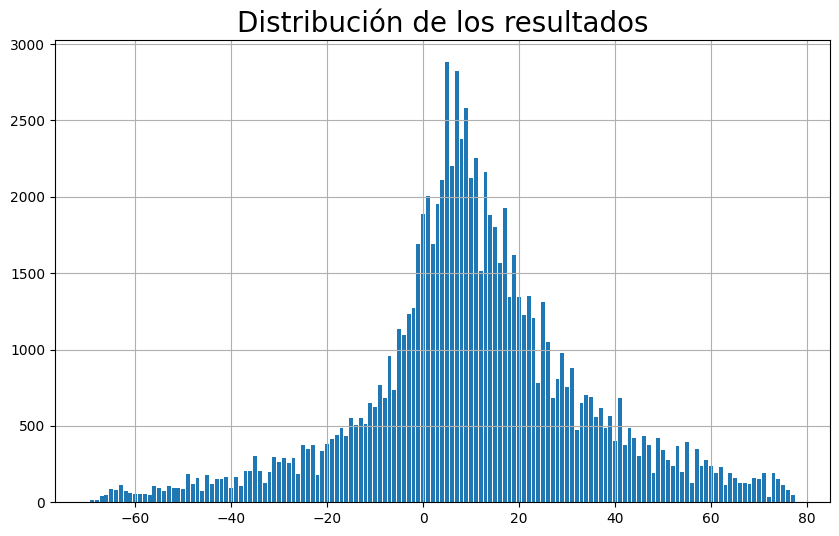

In [27]:
x = frec.index
y = frec.values

plt.figure(figsize= (10,6))

plt.bar(x, y)
plt.title('Distribución de los resultados', fontdict= {'fontsize':20})
plt.grid()

plt.show()

Esto puede ser problematico en cuanto una búsqueda aleatoria para encontrar el máximo y el mínimo pues estos valores o expresiones son mucho menos comunes que los centrales y por lo tanto hay una probabilidad inferior de que aleatoriamente se dén.

Sin embargo, ahora podemos ver que expresiones son las que nos devuelven el máximo y el mínimo, y ver si existe algun patrón (que lo hay) en las mismas.

In [28]:
print('Las expresiones que dan como resultado el máximo son las siguientes:')
print(dct_expresions[77])
print('\n')
print('Las expresiones que dan como resultado el mínimo son las siguientes:')
print(dct_expresions[-69])

Las expresiones que dan como resultado el máximo son las siguientes:
['7+8/1*9-2', '7+9/1*8-2', '7+8*9-2/1', '7+8*9-4/2', '7+8*9-6/3', '7+9*8-2/1', '7+9*8-4/2', '7+9*8-6/3', '7+8*9/1-2', '7+9*8/1-2', '7-2+8/1*9', '7-2+9/1*8', '7-2+8*9/1', '7-2+9*8/1', '7-2/1+8*9', '7-2/1+9*8', '7-4/2+8*9', '7-4/2+9*8', '7-6/3+8*9', '7-6/3+9*8', '7/1+8*9-2', '7/1+9*8-2', '7/1-2+8*9', '7/1-2+9*8', '8/1*9+7-2', '9/1*8+7-2', '8/1*9-2+7', '9/1*8-2+7', '8*9+7-2/1', '8*9+7-4/2', '8*9+7-6/3', '9*8+7-2/1', '9*8+7-4/2', '9*8+7-6/3', '8*9+7/1-2', '9*8+7/1-2', '8*9-2+7/1', '9*8-2+7/1', '8*9-2/1+7', '8*9-4/2+7', '8*9-6/3+7', '9*8-2/1+7', '9*8-4/2+7', '9*8-6/3+7', '8*9/1+7-2', '9*8/1+7-2', '8*9/1-2+7', '9*8/1-2+7']


Las expresiones que dan como resultado el mínimo son las siguientes:
['1+4/2-8*9', '1+4/2-9*8', '1+6/3-8*9', '1+6/3-9*8', '1-8*9+4/2', '1-8*9+6/3', '1-9*8+4/2', '1-9*8+6/3', '4/2+1-8*9', '4/2+1-9*8', '6/3+1-8*9', '6/3+1-9*8', '4/2-8*9+1', '4/2-9*8+1', '6/3-8*9+1', '6/3-9*8+1']


#### Patrones:

En este caso observamos que casi todas las operaciones:

##### Máximos

- Antes o despues del operador de multiplicaciones * tienen un 9 o un 8 (8x9 o 9x8) (el número más alto y el segundo más alto estan multiplicando)
- Después del operador de dividisión / es un 1 (El divisior es el número más bajo)
- El número 2 ya sea como resultado o como número suelto siempre esta restando (El segundo más bajo esta siempre restando)
- el número 7 esta sumando en todos los casos. (El tercer número más alto esta sumando)

##### Mínimos

- Antes o despues del operador de multiplicaciones * tienen un 9 o un 8 (8x9 o 9x8) (el número más alto y el segundo más alto estan multiplicando)
- El operador anterior siempre esta restando (antes de la multiplicación esta el operador de resta)
- El uno siempre esta sumando  (el minimo de esta sumando)
- El 2 como número o como resultado siempre esta sumando y es el resultado de una división (el resultado de la division siempre es un dos)

#### Conclusiones de los patrones

Gracias a estos patrones se puede reducir el espacio de busqueda, para la busqueda del máximo y el mínimo aunque aumente el numero de numeros que tenemos como candidatos, pues solo tenemos qeu explorar los que hemos comentado anteriormente. En caso de aumentar el número de operadores no sería posible pues cambiaria el significado matemático de la expresion y seguramente habria que aplicar otros patrones (por ejemplo si incluimos la potencia o la exponencial como operadores)

Tanto para la búsqueda del máximo y del minimo puedo:

- prescindir del número 5 siempre
- para el máximo necesito los 3 números más altos y para el mínimo los 2 números más altos
- en ambos casos necesito el minimo (el 1)
- en el máximo el 2 esta casi siempre presente
- en el mínimo si esta el 2 esta el 4, y si esta el 3, esta el 6 tambien y estos estan dividiendo.
- para crear todas las posibilidades si necesitaria el 2,4,3, y 6 pero con el 4 y 2 me basta para crear estos mínimos y máximos


### MEJORA DEL ALGORITMO MEDIANTE MÉTODO EXACTO: RAMIFICACIÓN Y PODA

En esta implementación se establecen algunos patrones de los mencionados anteriormente con el objetivo de obtener el máximo y el mínimo sin explorar todo el espacio de posibiidades. Se aplican los patrones estudiados para descartar las ramas que no van a llevarnos a los maximos o a los minimos

Esta mejora es muy especifica para este conjunto de operaciones y números en concreto, y no he comprobado que funcione para otros conjuntos de números (más adelante se comprobará si generaliza para otros casos o no), por lo tanto esta no es una mejora generalista.

Cabe mencionar que con un estudio más profundo de las expresiones que conforman los máximos y los mínimos se podría reducir aun más el espacio de búsqueda

#### Complejidad del algoritmo

Como se verá a continuación, mediante esta mejora, el algorítmo no hace más operaciones a medida que la entrada de números aumenta, pués siempre coge la misma cantidad de numeros **a**. Sin embargo, si que aumentaría **factorialmente** a medida que metemos más operadores aritmeticos, aunque la propia mejora no funcionaría en tal caso por que invalidaría los patrones. Siendo ls numeros a evaluar ahora constantes (y sus aplicaciones también, para simplificar), es decir **m y k** son constantes.

$$ complejidad = O(a*n!)$$

Siendo n la cantidad de operadores aritmeticos y a (una constante) la cantidad de operaciones relacionadas con la cantidad de números que selecciona para crear las expresiones que nos lleven al la busqueda del máximo y el mínimo.

In [29]:
nums = ('1','2','3','4','5','6','7','8','9')
operations = ('+', '-', '/', '*')

def evaluar_numeros_candidatos(nums= ('1','2','3','4','5','6','7','8','9')):
    
    nums = [int(n) for n in nums]                           # paso a int todos los numeros y los guardo en una lista
    nums.sort()
    numeros_pares = [n for n in nums if n%2 == 0]           # separo los pares 

    numeros_candidatos = []                                 # estos son mis candidatos
    numeros_candidatos.append(nums[0])                      # añado a mis candidatos el minimo 
    numeros_candidatos.extend(nums[-3:])                    # los 3 valores más grandes
    numeros_candidatos.extend(numeros_pares[:2])            # los dos primeros pares
    numeros_candidatos.sort()

    return numeros_candidatos


def secuencias_operacionales_con_poda(nums= ('1','2','3','4','5','6','7','8','9'), operations = ('+', '-', '/', '*')):
    import itertools

    nums = tuple([str(n) for n in evaluar_numeros_candidatos(nums)])

    permuted_nums = tuple([*itertools.permutations(nums, 5)])                           # las permutaciones de los números
    permuted_operations = tuple(*[itertools.permutations(operations, len(operations))]) # las permutaciones de las operaciones

    expresions = []                                                                     # aqui guardaremos las expresiones resultado

    for operation_sec in permuted_operations:                                           # para cada operación en la lista de permutaciones
        for num_sec in permuted_nums:                                                   # para cada secuencia de numeros en la lista de permutaciones

            expresion = [i for i in range(len(num_sec) + len(operation_sec))]           # creo una lista del tamaño total que tendrá la expresion final
            
            i = 0                                                                       # el indice de las secuencias de numeros 
            j = 0                                                                       # el indice de las secuencias de operaciones
            k = 0                                                                       # el indice de la expresion final

            while k < len(expresion):                                                   # mientras que k sea inferior al tamaño de mi expresion

                if k%2==0:                                                              # si k es par introduce el numero i en la posicion k
                    expresion[k] = num_sec[i]
                    i += 1                                                              # se aumentan los indices i y k
                    k += 1

                elif k%2 != 0:                                                          # si k es impar entonces introduce el elmento operacional j en la posicion k de la expresion
                    expresion[k] = operation_sec[j]
                    j += 1                                                              # se aumentan los indices k y j 
                    k += 1
            #print(expresion)
            expresion = ''.join(expresion)                                              # se construye la expresion con el método join para pasar de lista a str
            if eval(expresion)-int(eval(expresion)) == 0:                               # se evalua si la expresion es un entero, y si lo es se añade a la lista de expresiones válidas
                expresions.append(expresion)

    return expresions                                                                   # se devuelve la lista de operacionnes válidas
        
expresions_1 = secuencias_operacionales_con_poda()

print(len(expresions_1)) 

5472


In [30]:
dct_expresiones_trucadas = dct_espacio_de_posibilidades(expresions_1)

print(f'El máximo es: {max(dct_expresiones_trucadas.keys())}, y el mínimo {min(dct_expresiones_trucadas.keys())}')

El máximo es: 77, y el mínimo -69


Por lo tanto se ha conseguido los minimos y los maximos pero explorando un espacio de posibiidades mucho más pequeño que el anterior.

#### ¿Funcionará el algoritmo para una secuencia de numeros más alta?

#### Por fuerza bruta

##### para 10 numeros

In [31]:
expresions_2_10 = secuencias_operacionales_fuerza_bruta(nums= ('1','2','3','4','5','6','7','8','9','10'))
dct_expresiones_2_10 = dct_espacio_de_posibilidades(expresions_2_10)
print(f'El espacio de búsqueda ha aumentado {len(expresions_2_10)} expresiones')
print(f'El máximo es: {max(dct_expresiones_2_10.keys())}, y el mínimo {min(dct_expresiones_2_10.keys())}')

El espacio de búsqueda ha aumentado 181440 expresiones
El máximo es: 96, y el mínimo -87


##### para 11 numeros 

In [32]:
expresions_2_11 = secuencias_operacionales_fuerza_bruta(nums= ('1','2','3','4','5','6','7','8','9','10','11'))
dct_expresiones_2_11 = dct_espacio_de_posibilidades(expresions_2_11)
print(f'El espacio de búsqueda ha aumentado {len(expresions_2_11)} expresiones')
print(f'El máximo es: {max(dct_expresiones_2_11.keys())}, y el mínimo {min(dct_expresiones_2_11.keys())}')

El espacio de búsqueda ha aumentado 282240 expresiones
El máximo es: 117, y el mínimo -107


##### para 12 numeros 

In [33]:
expresions_2_12 = secuencias_operacionales_fuerza_bruta(nums= ('1','2','3','4','5','6','7','8','9','10','11','12'))
dct_expresiones_2_12 = dct_espacio_de_posibilidades(expresions_2_12)
print(f'El espacio de búsqueda ha aumentado {len(expresions_2_12)} expresiones')
print(f'El máximo es: {max(dct_expresiones_2_12.keys())}, y el mínimo {min(dct_expresiones_2_12.keys())}')

El espacio de búsqueda ha aumentado 535680 expresiones
El máximo es: 140, y el mínimo -129


##### para 13 números

In [34]:
expresions_2_13 = secuencias_operacionales_fuerza_bruta(nums= ('1','2','3','4','5','6','7','8','9','10','11','12', '13'))
dct_expresiones_2_13 = dct_espacio_de_posibilidades(expresions_2_13)
print(f'El espacio de búsqueda ha aumentado {len(expresions_2_13)} expresiones')
print(f'El máximo es: {max(dct_expresiones_2_13.keys())}, y el mínimo {min(dct_expresiones_2_13.keys())}')

El espacio de búsqueda ha aumentado 756000 expresiones
El máximo es: 165, y el mínimo -153


#### Con el algoritmo de ramificación y poda

Vamos a comprobar si nuestro algoritmo consigue los mismos resultados y el tamaño del espacio de posibilidades evaluado

##### para 10 números

In [35]:
expresions_3_10 = secuencias_operacionales_con_poda(nums= ('1','2','3','4','5','6','7','8','9','10'))
dct_expresiones_3_10 = dct_espacio_de_posibilidades(expresions_3_10)
print(f'El espacio de búsqueda ha aumentado ha {len(expresions_3_10)} expresiones')
print(f'El máximo es: {max(dct_expresiones_3_10.keys())}, y el mínimo {min(dct_expresiones_3_10.keys())}')

El espacio de búsqueda ha aumentado ha 6336 expresiones
El máximo es: 96, y el mínimo -87


##### para 11 números 

In [36]:
expresions_3_11 = secuencias_operacionales_con_poda(nums= ('1','2','3','4','5','6','7','8','9','10','11'))
dct_expresiones_3_11 = dct_espacio_de_posibilidades(expresions_3_11)
print(f'El espacio de búsqueda ha aumentado ha {len(expresions_3_11)} expresiones')
print(f'El máximo es: {max(dct_expresiones_3_11.keys())}, y el mínimo {min(dct_expresiones_3_11.keys())}')

El espacio de búsqueda ha aumentado ha 4608 expresiones
El máximo es: 117, y el mínimo -107


##### para 12 números

In [37]:
expresions_3_12 = secuencias_operacionales_con_poda(nums= ('1','2','3','4','5','6','7','8','9','10','11','12'))
dct_expresiones_3_12 = dct_espacio_de_posibilidades(expresions_3_12)
print(f'El espacio de búsqueda ha aumentado ha {len(expresions_3_12)} expresiones')
print(f'El máximo es: {max(dct_expresiones_3_12.keys())}, y el mínimo {min(dct_expresiones_3_12.keys())}')

El espacio de búsqueda ha aumentado ha 6048 expresiones
El máximo es: 140, y el mínimo -129


##### para 13 números

In [38]:
expresions_3_13 = secuencias_operacionales_con_poda(nums= ('1','2','3','4','5','6','7','8','9','10','11','12','13'))
dct_expresiones_3_13 = dct_espacio_de_posibilidades(expresions_3_13)
print(f'El espacio de búsqueda ha aumentado ha {len(expresions_3_13)} expresiones')
print(f'El máximo es: {max(dct_expresiones_3_13.keys())}, y el mínimo {min(dct_expresiones_3_13.keys())}')

El espacio de búsqueda ha aumentado ha 5328 expresiones
El máximo es: 165, y el mínimo -153


#### CONCLUSIONES

Se puede observar como nuestro algoritmo con ramificación y poda encuentra mucho más rápido los valores máximos y mínimos de las expresiones. Lo que más interesante de todo es que a medida que nuestro numero de candidatos aumenta, con el algoritmo con poda, el espacio de posiblidades no aumenta de tamaño.

pero....

##### ¿que limitaciones tiene nuestro algoritmo con truco?

- los candidatos aumentan hacia arriba.

hay que tener en cuenta que nuestro algoritmo sigue unas simples reglas:

- cojer los tres números más altos
- el más bajo (el 1) (esto siempre)
- y el 2 y el 4 (lo que es lo mismo los dos primero pares)

Si empezamos a meter solo numeros impares, o solo pares al final de la lista de candidatos el algorimto no va ha funcionar bien... es decir la entrada debe estar preparada. En este caso es algo que se puede solucionar facilmente pero tambíen se puede alterar la entrada de otras maneras...

Para no complicarlo más, lo dejaré así.

### IMPLEMENTANDO HEURÍSTICAS


#### Búsqueda aleatoria

##### Complejidad del algoritmo 

Este algoritmo produce secuencias operacionales aleatorias del tamaño de una muestra que nosotros le indiquemos, es decir, no hace una busqueda exaustiva del espacio de posibilidades y por lo tanto la cantidad de operaciones que realiza no depende de la cantidad de numeros o operadores aritméticos que le demos como entrada, pues el algoritmo construye secuencias basadas en pura aleatoriedad del tamaño que nosotros le indiquemos en este caso 5 numeros (esto no lo he considerado a elección del usuario, pero se podría generalizar) y 4 operadores, lo que significa que aumentar m (numeros) y n (operadores aritméticos), solo aumenta las posibilidades de elección, pero no la cantidad de operaciones a realizar.

De este modo la cantidad de operaciones que debe realizar el algorimto depende de el tamaño de la muestra que nosotros queramos:

$$ complejidad = o(n) $$

Siendo n el tamaño de la muestra

In [39]:
def evaluar_expresion(secuencia_operacional):
    if (eval(secuencia_operacional) - int(eval(secuencia_operacional))) == 0:
        return True

def generar_secuencia_operacional_aleatoria(nums= ['1','2','3','4','5','6','7','8','9'], operations = ['+', '-', '/', '*']):
    '''
    Esta función devuelve una sola expresion generada aleatoriamente, solo si su resultado es un entero
    '''
    import random
    random.shuffle(nums)
    random.shuffle(operations)
    numeros_elegidos = nums[:5]
    expresion = [i for i in range(len(numeros_elegidos) + len(operations))]     # creo una lista del tamaño total que tendrá la expresion final
            
    i = 0                                                                       # el indice de las secuencias de numeros 
    j = 0                                                                       # el indice de las secuencias de operaciones
    k = 0                                                                       # el indice de la expresion final

    while k < len(expresion):                                                   # mientras que k sea inferior al tamaño de mi expresion

        if k%2==0:                                                              # si k es par introduce el numero i en la posicion k
            expresion[k] = numeros_elegidos[i]
            i += 1                                                              # se aumentan los indices i y k
            k += 1

        elif k%2 != 0:                                                          # si k es impar entonces introduce el elmento operacional j en la posicion k de la expresion
            expresion[k] = operations[j]
            j += 1                                                              # se aumentan los indices k y j 
            k += 1

    expresion = ''.join(expresion)

    if evaluar_expresion(expresion):
        return expresion #, eval(expresion)
    
    
def dct_espacio_de_posibilidades(todas_las_expresiones): # ES LA MISMA FUNCION DICCIONARIO DE ANTES, LA TRAIGO AQUI POR COMODIDAD
    '''
    Esta funcion devuelve un diccionario, siendo las llaves los valores evaluados o resultados de las expresiones, y los values, las expresiones que dan ese valor,
    despues se devolvera el diccionario ordenado segun las llaves.
    '''
    dct_posibilidades = {}                                                             # nuestro diccionario
    for expresion in todas_las_expresiones:                                            # para cada expresion

        expresion_evaluada = int(eval(expresion))                                      # el resultado de la expresion matematica
        if expresion_evaluada not in dct_posibilidades.keys():                         # si ese resultado no esta dentro de las llaves del diccionario

            dct_posibilidades[expresion_evaluada] = []                                 # se asigna una nueva llave con el resultado y se crea una lista vacia como valor

        dct_posibilidades[expresion_evaluada].append(expresion)                        # se guarda la expresion en la lista de cada valor, es decir, la llave 1 contendra todas las 
                                                                                       # expresiones que dan como resultado un 1
    
    dct_posibilidades = dict(sorted(dct_posibilidades.items(), key= lambda x:x[0]))    # ordeno el diccionario segun las llaves en orden ascendente

    return dct_posibilidades                                                           # devuelvo el diccionario

    
def muestra_aleatoria_de_secuencias_operacionales(tamano_muestra, nums= ['1','2','3','4','5','6','7','8','9'], operations = ['+', '-', '/', '*']):
    '''
    Esta funcion devuelve una muestra aleatoria de secuencias operacionales, del tamaño indicado

    '''
    expresions = []                                     # creo la lista de expresiones validas

    while len(expresions) < tamano_muestra:             # mientras el tamaño de la expresion sea inferior al de la muestra ejecuta el siguiente codigo

        secuencia_operacional = generar_secuencia_operacional_aleatoria(nums= nums, operations=operations)  # creo una secuencia aleatoria

        if secuencia_operacional != None:               # si la secuencia es entera se añade a la lista de operaciones validas
            expresions.append(secuencia_operacional)

    return dct_espacio_de_posibilidades(expresions)     # se devuelven las soluciones en formato diccionario


def expresion_maxima(dct_muestra_aleatoria):
    '''
    devuelve el maximo de una muestra, y las operaciones que devuelven ese valor en formato tupla 
    '''            
    maximo = max(dct_muestra_aleatoria.keys())
    expresiones_max = dct_muestra_aleatoria[maximo]
    return maximo, expresiones_max


def expresion_minima(dct_muestra_aleatoria):
    '''
    devuelve el minimo de una muestra, y las operaciones que devuelven ese valor en formato tupla 
    ''' 
    minimo = min(dct_muestra_aleatoria.keys())
    expresiones_min = dct_muestra_aleatoria[minimo]
    return minimo, expresiones_min

In [40]:
secuencia_aleatoria = muestra_aleatoria_de_secuencias_operacionales(1000)
print(secuencia_aleatoria)
print(f'el maximo {expresion_maxima(secuencia_aleatoria)}')
print(f'el minimo {expresion_minima(secuencia_aleatoria)}')


{-65: ['3-8*9+4/1', '2/1-8*9+5'], -63: ['3+6-8*9/1'], -61: ['7+4-8*9/1'], -59: ['8/4+2-7*9'], -58: ['3/1+2-9*7', '2+3/1-7*9'], -57: ['6/2+3-9*7'], -56: ['2/1-9*7+5'], -53: ['4-9*7+6/1'], -52: ['5+6-7*9/1'], -49: ['6-9*7+8/1', '5-8*7/1+2', '6+8/1-7*9'], -48: ['3+5-7/1*8', '6/1+2-8*7'], -47: ['4/2-6*9+5'], -44: ['3+9-7*8/1', '3+7/1-9*6'], -42: ['8-9*6/1+4', '5/1-8*7+9', '4/1-8*6+2'], -41: ['9-8/1*7+6', '2+8/4-9*5', '9-8*7+6/1', '5+4/2-8*6'], -40: ['8/4+3-9*5'], -37: ['2-9*5/1+6', '2+3-7*6/1'], -36: ['4/1+2-7*6', '6+3-9*5/1', '3-5*9/1+6', '2-5*9+7/1'], -35: ['9/3+4-7*6', '4/2+8-9*5', '6/2-5*9+7'], -32: ['8+2/1-7*6', '3-9*8/2+1'], -31: ['3-9*4/1+2', '1+6/2-5*7'], -30: ['3+4/2-5*7', '3-7/1*6+9', '2+3-7*5/1', '6/2+3-9*4', '3+9-6/1*7'], -29: ['9/1-8*5+2', '8-7*6+5/1', '1-8/2*9+6', '4+3-8/2*9'], -28: ['5+9-7/1*6', '6-9*4/1+2'], -27: ['6/1+7-5*8', '3+6-4/1*9'], -26: ['3/1+6-7*5', '7+3-9/2*8', '6+9/3-5*7'], -25: ['2-4*8+5/1', '7+4-9*8/2', '8/2+7-4*9', '2/1-4*8+5', '8+4/2-5*7'], -24: ['4/1-5*6+2'

#### Búsqueda local

#### complejidad del algoritmo

En este caso, se le suma al anterior algoritmo (pues este es una extensión del mismo) la exploración de vecinos, de los candidatos máximo y mínimo, en un limite de operaciones; llamemoslo la variable **p**. 

El algoritmo hace lo siguiente:

- Genera una muestra aleatoria de expresiones del tamaño n
- Escoge las una de las expresione que dan el máximo y otra que da el mínimo
- Para cada uno de los anteriores explora p vecinos.

Por lo tanto la complejidad del algoritmo de **busqueda local**:


$$ complejidad = O(2*p*n) $$

y si hacemos una **busqueda local multi - arranque** (como se verá a continuación) de **x veces**, es decir, repetir o probar el algoritmo x veces, la complejidad sería:


$$ complejidad = O(2*p*n*x) $$

In [41]:
def generar_secuencias_operacionales_vecinas(expresion, limite_iteraciones = 100):
    '''
    Esta funcion genera secuencias operacionales vecinas intercambiando dos nodos de lugar, para ello, hay que tener en cuenta que para que la secuencia tenga sentido matemático,
    los indices a intercambiar han de ser pares o impares, de lo contrairo se podría formular una secuencia erronea del tipo '3+*12-5/1'.
    '''
    import random

    indices = list(range(len(expresion)))                      # Se crea una lista con los indices a seleccionar
    expresion = list(expresion)                                # la expresion se pasa a tipo lista
    iteracion = 0
    soluciones_vecinas = []                                    # se crea la lista de operaciones vecinas

    while iteracion < limite_iteraciones:                      # mientras no se supere el limite de iteraciones ejecuta el siguiente codigo
        iteracion += 1
        los_dos_indices_son_pares_o_impares = False

        while los_dos_indices_son_pares_o_impares == False:    # mientras los ambos indices no sean pares o impares
            _indices = indices.copy()
            i = random.choice(_indices)
            _indices.remove(i)
            j = random.choice(_indices) 

            i_y_j_son_pares = (i%2==0) & (j%2==0)
            i_y_j_son_impares = (i%2!=0) & (j%2!=0) 

            if i_y_j_son_impares or i_y_j_son_pares:
                los_dos_indices_son_pares_o_impares = True    # cuando ya tengo ambos indices de la misma familia 

        i_min = min(i, j)                                     # reordeno los indices
        i_max = max(i,j)
        
        secuencia_vecina = expresion[:i_min] + [expresion[i_max]] + expresion[i_min+1:i_max] + [expresion[i_min]] + expresion[i_max+1:]  # creo la solucion vecina
        secuencia_vecina= ''.join(secuencia_vecina)           # paso la solucion vecina a tipo string

        if evaluar_expresion(secuencia_vecina):               # si la funcion da entero
            soluciones_vecinas.append(secuencia_vecina)       # añadelo a mi lista de soluciones vecinas
    
    return dct_espacio_de_posibilidades(soluciones_vecinas)   # devuelve el espacio de posibilidades pasado a diccionario 


def busqueda_local(nums= ['1','2','3','4','5','6','7','8','9'], operations = ['+', '-', '/', '*']):

    '''
    Esta función printea el maximo y el minimo de una busqueda aleatoria y después coge una de las expresiones que dan el máximo y el mínimo encontrado, y genera 
    soluciones vecinas para ambos casos. Finalmente vuelve a printear los resultados de las solcuiones vecinas para poder compararlos con los de la solucion aleatoria
    La función no devuelve nada, solo printea.
    '''

    secuencia_operacional_aleatoria = muestra_aleatoria_de_secuencias_operacionales(1000, nums= nums, operations=operations)        # creamos una muestra aleatoria 
    maximo_y_sus_expresiones = expresion_maxima(secuencia_operacional_aleatoria)                                                    # guardamos el maximo
    minimo_y_sus_expresiones = expresion_minima(secuencia_operacional_aleatoria)                                                    # guardamos el mínimo
    print(f'el maximo de la busqueda aleatoria es {maximo_y_sus_expresiones[0]} y sus expresiones: {maximo_y_sus_expresiones[1]}')
    print(f'el minimo de la busqueda aleatoria es {minimo_y_sus_expresiones[0]} y sus expresiones: {minimo_y_sus_expresiones[1]}')
    print('\n')

    vecino_de_maximos = generar_secuencias_operacionales_vecinas(maximo_y_sus_expresiones[1][0])    # se generan vecinos para el maximo
    vecino_de_minimos = generar_secuencias_operacionales_vecinas(minimo_y_sus_expresiones[1][0])    # se generan vecinos para el minimo
    maximo_vecino_de_maximos = expresion_maxima(vecino_de_maximos)                                  # se guarda el maximo de los vecinos                                   
    minimo_vecino_de_minimos = expresion_minima(vecino_de_minimos)                                  # se guarda el minimo de los vecinos

    if maximo_vecino_de_maximos[0] > maximo_y_sus_expresiones[0]:                                   # se comparan los resultados y se guardan los mejores resulados de ambas búsqudas
        maximo_encontrado = maximo_vecino_de_maximos
    else:
        maximo_encontrado = maximo_y_sus_expresiones
    
    if minimo_vecino_de_minimos[0] < minimo_y_sus_expresiones[0]:
        minimo_encontrado = minimo_vecino_de_minimos
    else:
        minimo_encontrado = minimo_y_sus_expresiones

    print(f'El maximo de la busqueda local es {maximo_encontrado[0]} y sus expresiones: {maximo_encontrado[1]}')
    print(f'El minimo de la busqueda local es {minimo_encontrado[0]} y sus expresiones: {minimo_encontrado[1]}')
    
    return None

In [42]:
busqueda_local()

el maximo de la busqueda aleatoria es 76 y sus expresiones: ['8*9-4/2+6']
el minimo de la busqueda aleatoria es -69 y sus expresiones: ['1+4/2-9*8']


El maximo de la busqueda local es 76 y sus expresiones: ['8*9-4/2+6']
El minimo de la busqueda local es -69 y sus expresiones: ['1+4/2-9*8']


Los resultados no parecen ser demasiado notorios, parece que con la búsqueda aleatoria simple ya da buenos resultados, y la generación de soluciones vecinas no da demasiado buenos resultados. Vamos a corroborar esto con una busqueda local con multi arranque:

#### Búsqueda local multi arranque

Es tan simple como realizar el experimento varias veces, en este caso se realizara 10 veces


In [43]:
for n in range(10):
    busqueda_local()
    print('\n')
    print('\t\t\t' +  '#'*100)
    print('\n')

el maximo de la busqueda aleatoria es 77 y sus expresiones: ['7+8*9/1-2']
el minimo de la busqueda aleatoria es -65 y sus expresiones: ['5-8/1*9+2', '4/2-8*9+5']


El maximo de la busqueda local es 77 y sus expresiones: ['7+8*9/1-2']
El minimo de la busqueda local es -65 y sus expresiones: ['5-8/1*9+2', '4/2-8*9+5']


			####################################################################################################


el maximo de la busqueda aleatoria es 77 y sus expresiones: ['7-6/3+8*9']
el minimo de la busqueda aleatoria es -66 y sus expresiones: ['3-8*9+6/2', '2/1-8*9+4', '4+6/3-9*8']


El maximo de la busqueda local es 77 y sus expresiones: ['7-6/3+8*9']
El minimo de la busqueda local es -68 y sus expresiones: ['2-8*9+6/3', '2-8*9+6/3', '2-8*9+6/3', '2-8*9+6/3', '2-8*9+6/3', '2-8*9+6/3', '2-8*9+6/3', '2-8*9+6/3']


			####################################################################################################


el maximo de la busqueda aleatoria es 77 y sus expresione

## CONCLUSIONES

La búsqueda local no mejora de manera significativa los resultados obtenidos por la búsqueda aleatoria por muestra, al menos para este tamaño de expresiones o secuencias operacionales. Voy a dar el trabajo por concluido, ya que la funciones no estan preparadas para separar bien valores de dos o más dígitos, es decir, las funciones programadas en este trabajo no generalizan correctamente a medida que el tamaño de las entradas aumenta.

De este modo quedan **implementadas las mejoras por métodología determinista** (esa búsqueda de patrones realizada previamente) y por **métodos aproximados o heurísticos** (búsqueda aleatoria y búsqueda local conn multi-arranque). Ambas muy simples, pero que ayudan a reducir el espacio de posiblidades y en el caso del método por patrones logra encontrar el máximo y el mínimo sin que aumente el espacio de posibilidades, y mediante la búsqueda local y aleatoria logra resultados bastante buenos.

Sin embargo esta investigación o trabajo tiene mucho margen de mejora.

### Posibles mejoras o continuaciones del trabajo

La mejora inmediata del trabajo sería implementar unas funciones que generalizen bien a medida que el tamaño de las entradas aumentan (números y/o operadores aritméticos).

La siguiente mejora inmediata sería aplicar un recocido simulado.

Y el problema parece estar bien encaminado para poder aplicar algoritmos genéticos y/o evolutivos, aplicando técnicas como cruce y mutación.